In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde el archivo CSV
data = pd.read_csv('data\data_HW3.csv')

# Extraer las columnas de x e y
x = data['x'].values
y = data['y'].values

X = np.column_stack((np.ones(len(x)), x))

XtX = np.dot(X.T, X)
Xty = np.dot(X.T, y)
theta = np.linalg.solve(XtX, Xty)

print("Theta estimado:", theta)


Theta estimado: [ 1.07351838 -3.05416899]


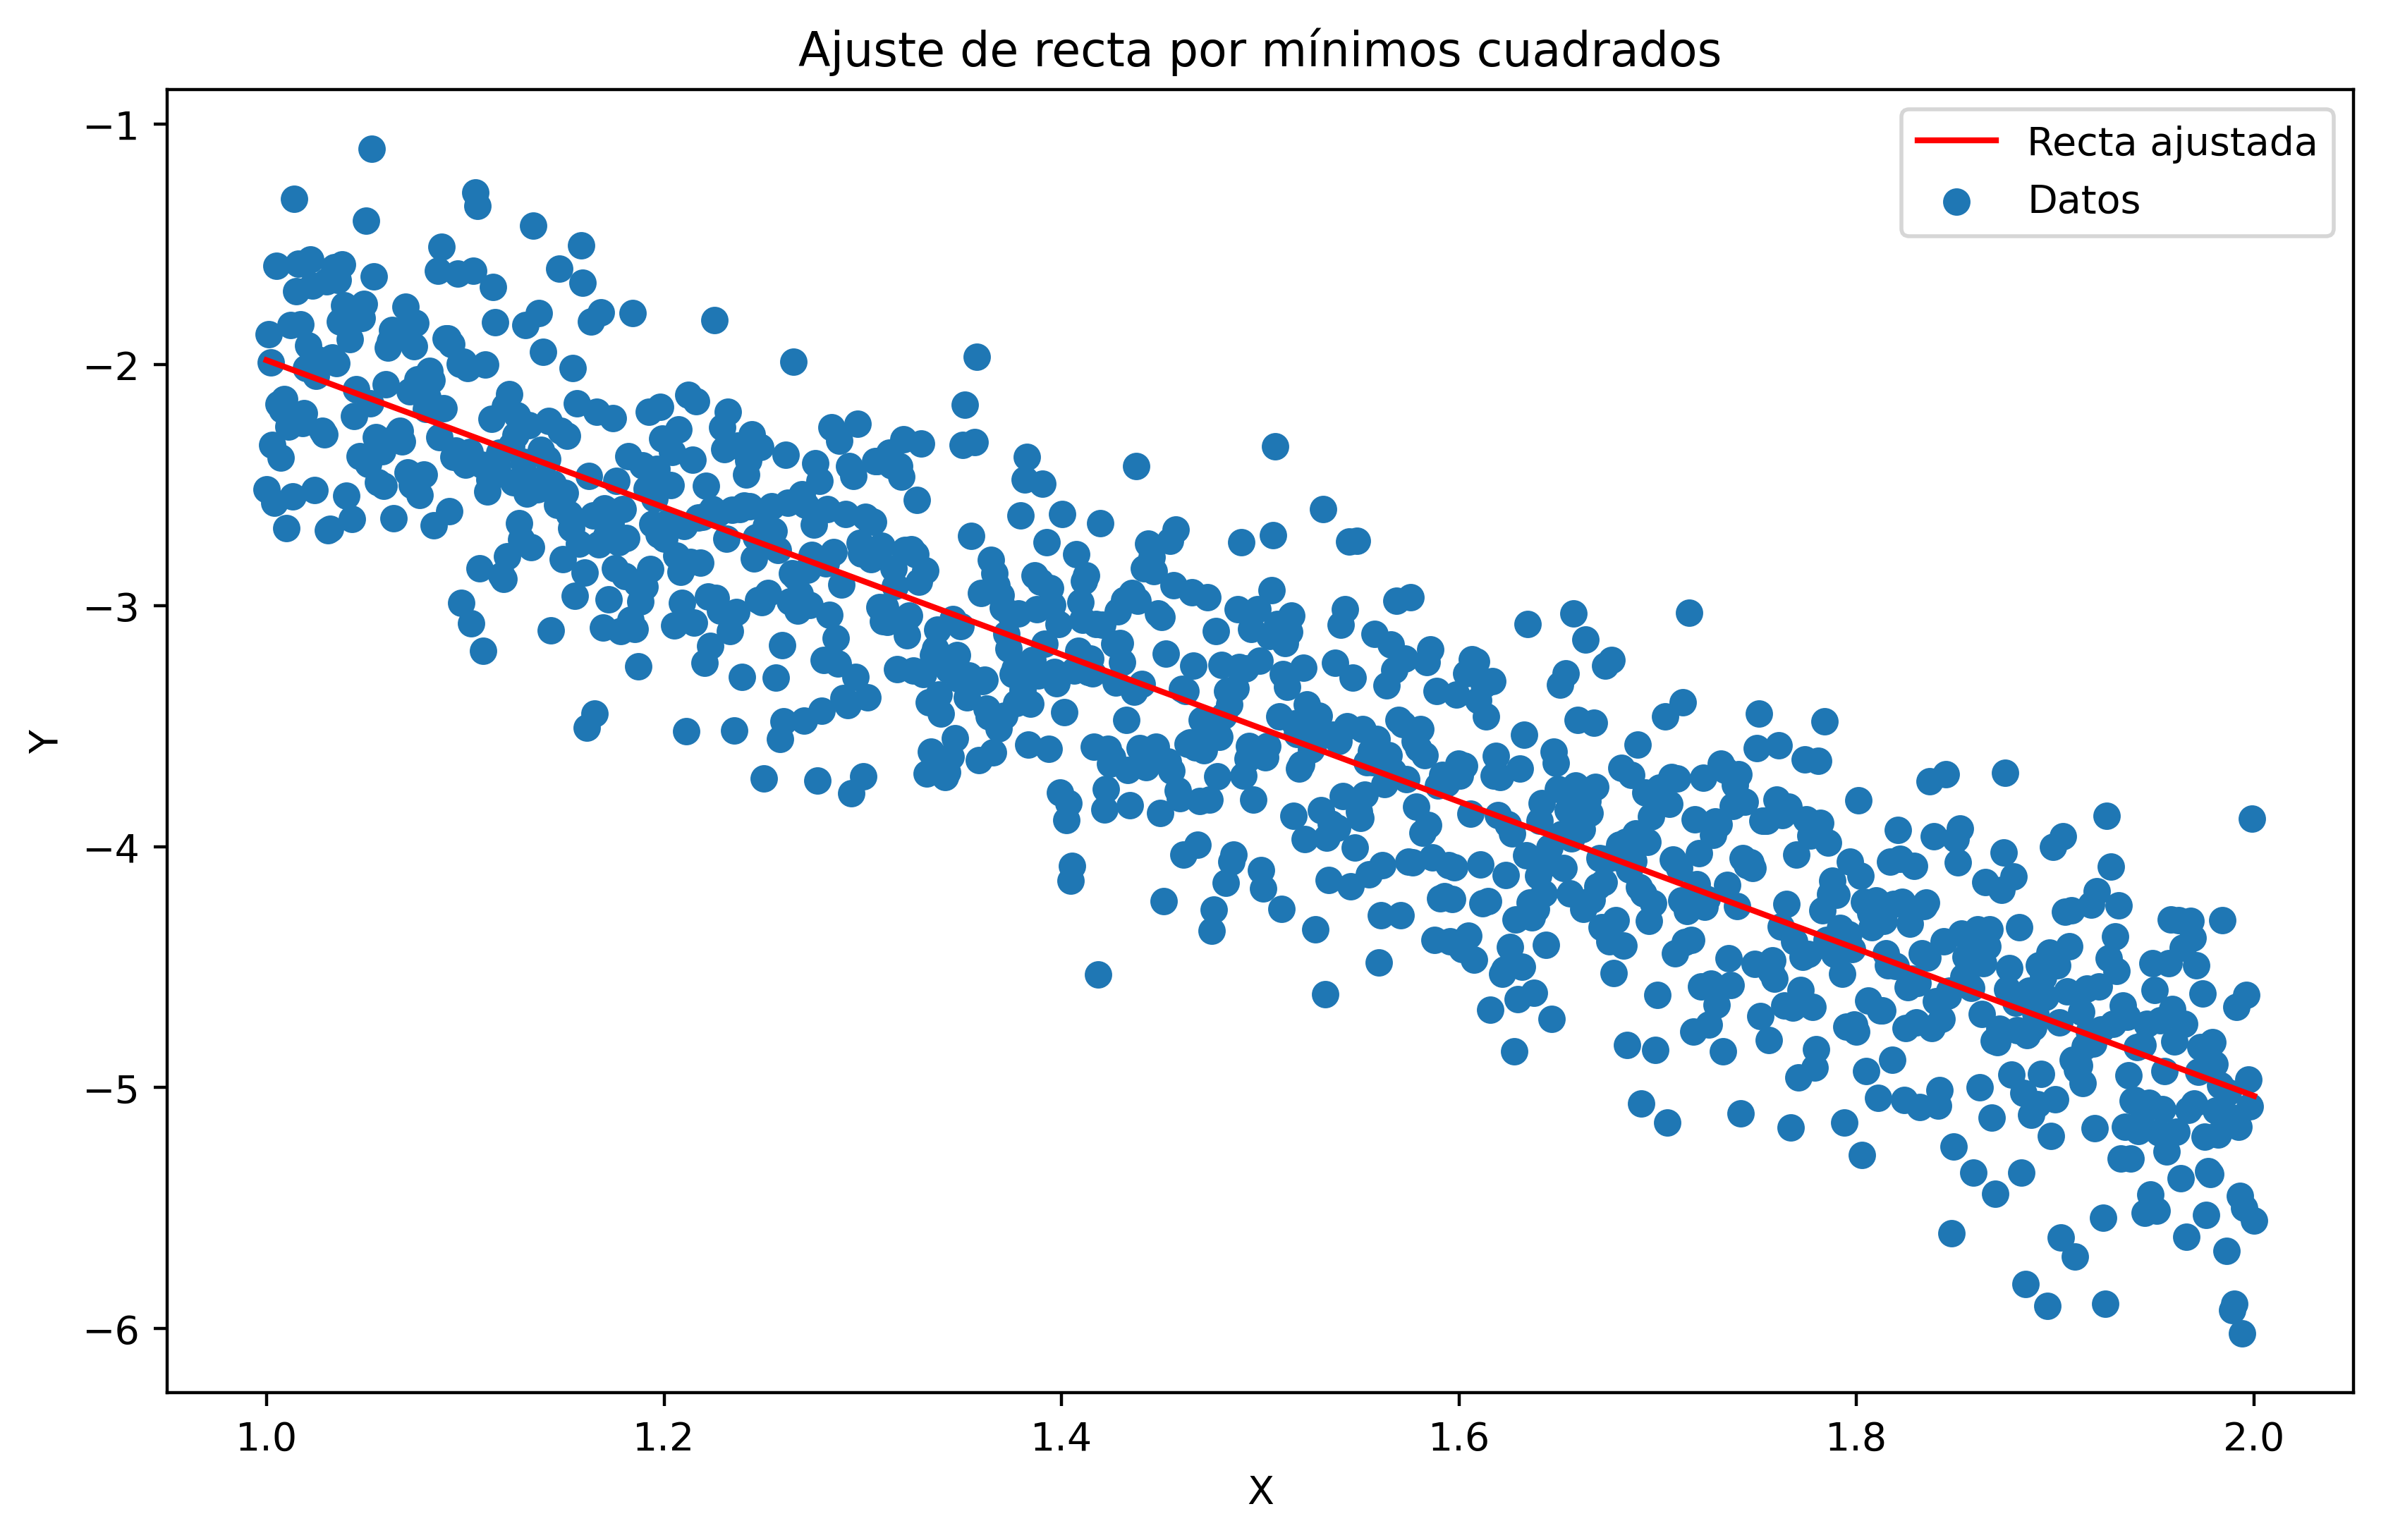

In [12]:
x_range = np.linspace(min(x), max(x), 100)
y_pred = theta[0] + theta[1] * x_range
plt.figure(figsize=(10, 6), dpi=400)
plt.plot(x_range, y_pred, color='red', label="Recta ajustada")
plt.scatter(x, y, label="Datos")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Ajuste de recta por mínimos cuadrados")
plt.savefig('plot/T3.png')
plt.show()

In [26]:
# Lectura de archivos
data = pd.read_csv("data/data_HW3.csv", sep=",")
x = data["x"].to_numpy()
y = data["y"].to_numpy()

In [3]:
def grad_L(xi, yi, theta, l):
    return np.array([(xi * (theta[0] * xi + theta[1] - yi)),
                     (theta[0] * xi + theta[1] - yi)])

def SGD(x, y, epochs):
    theta = np.random.randn(2)
    for epoch in range(epochs):
        for i in range(len(x)):
            xi, yi = x[i], y[i]
            theta -= (1/i if i>= 1 else 1) * grad_L(xi, yi, theta, len(x))
    return theta[0], theta[1]
a, b = SGD(x, y, 1000)

In [4]:
print(a,b)

-3.0729902166621574 1.1018154993352784


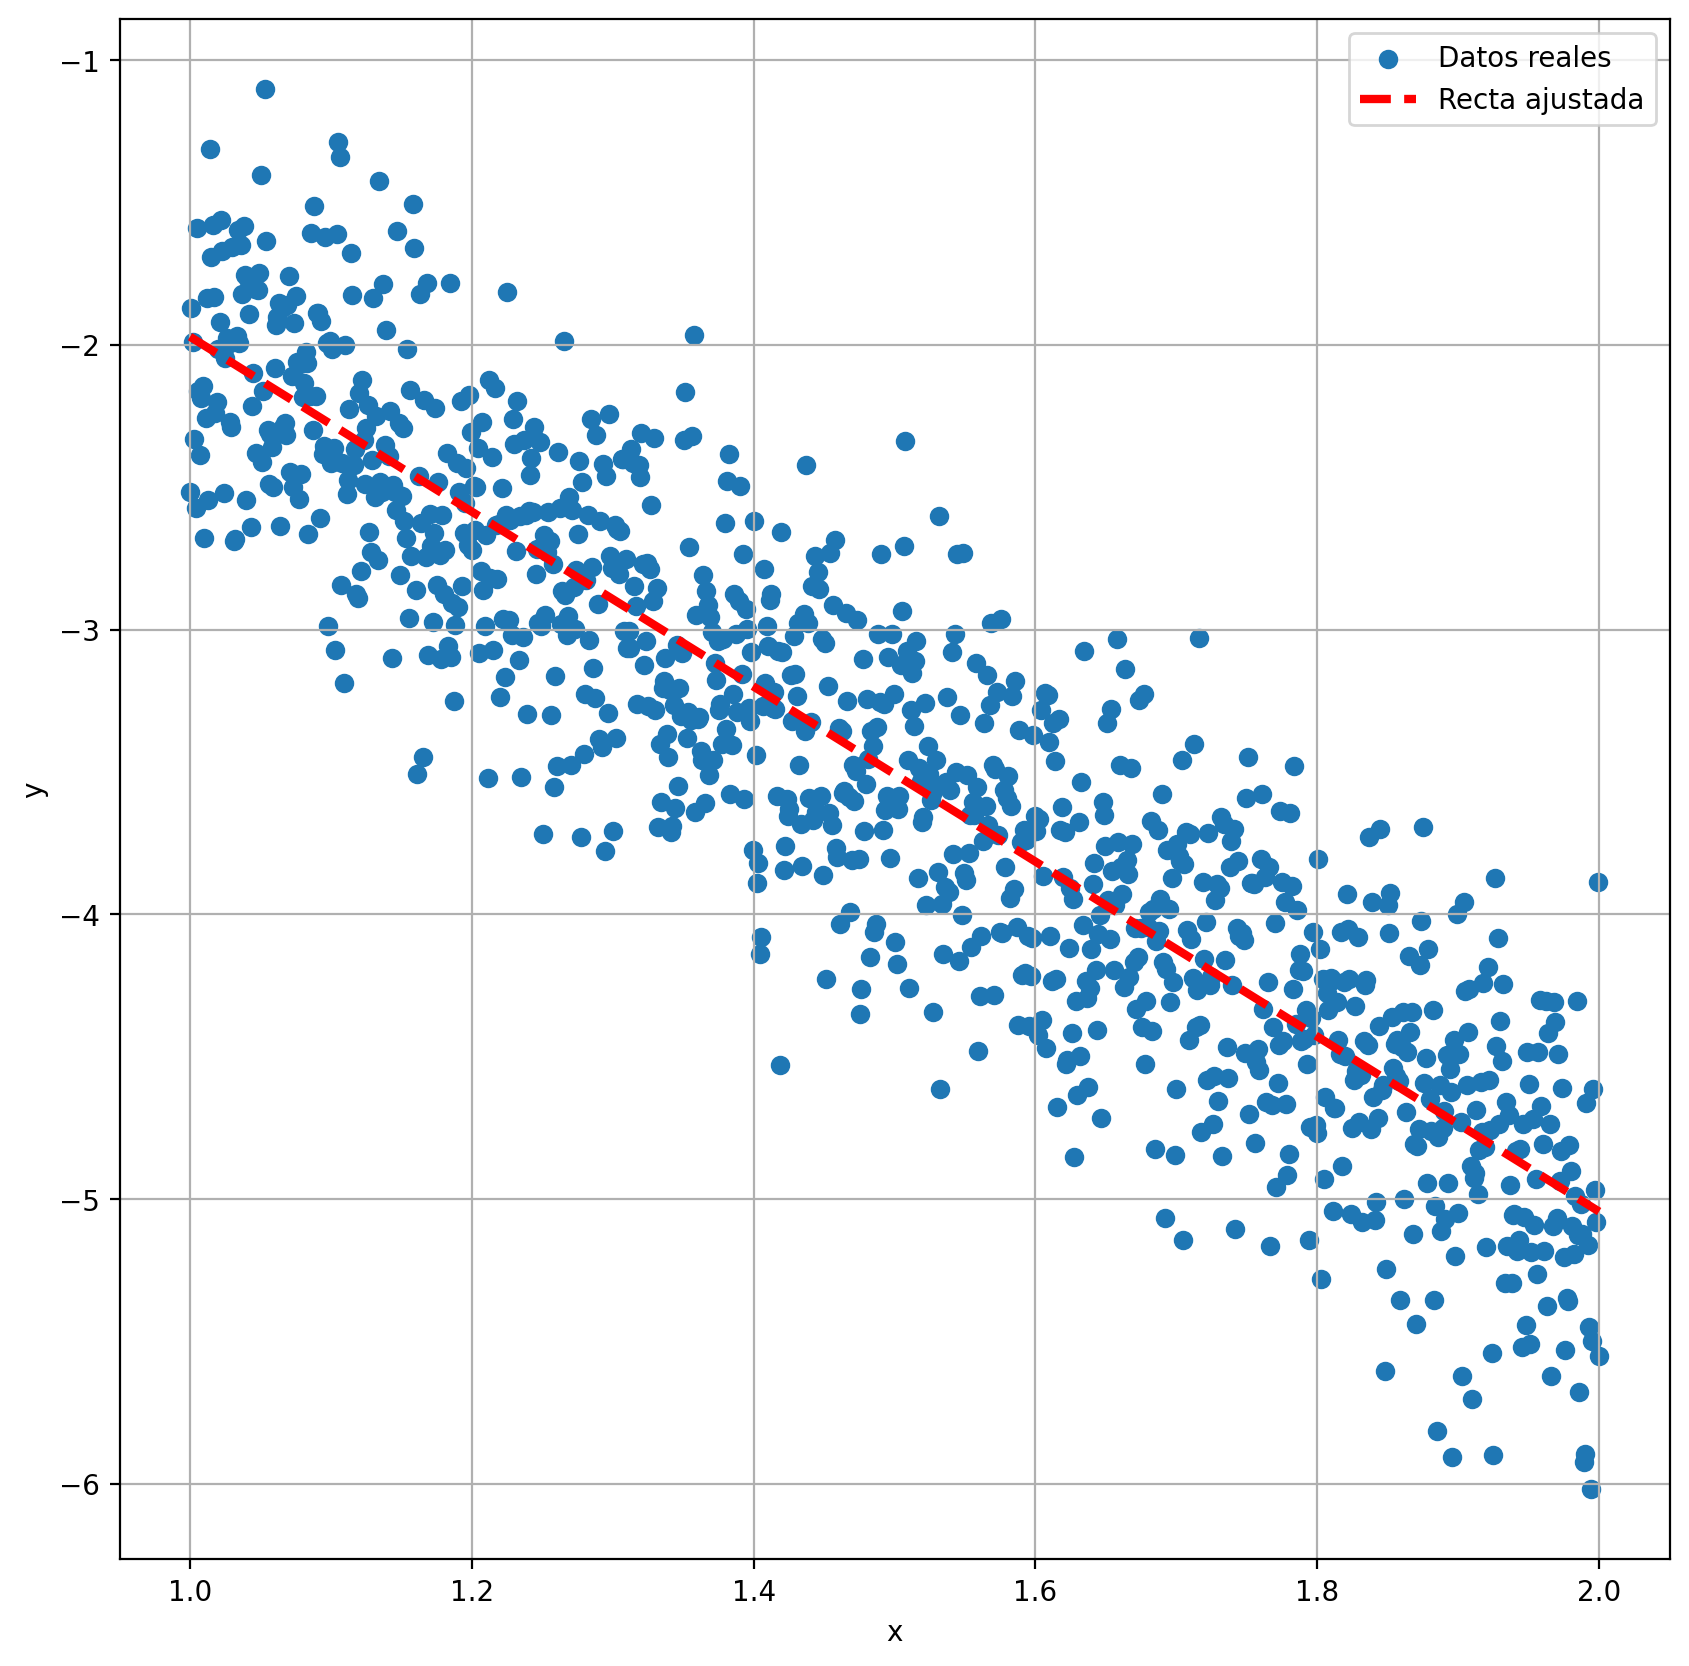

In [9]:
plt.figure(figsize=(10,10), dpi=200)
plt.scatter(x, y, label='Datos reales')
y_pred = a * x + b
plt.plot(x, y_pred, color='red', linewidth=3, label='Recta ajustada', linestyle="--")

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.savefig("plot/SGD.png")
plt.show()